In [ ]:
# importing required libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/content/drive/MyDrive/loan-predictionUC.csv (3).csv")

In [ ]:
# display the first and last 5 rows(head and tail) of the data to understand the dataset
print("Shape of data: ", data.shape,'\n')
print(data)
print(data.head())
print(data.tail())

Shape of data:  (614, 13) 

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849              

In [ ]:
# displaying information about the dataset, including data types and missing values
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

In [ ]:
# finding the total number of missing values in each column of the dataset
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# handling the missing values by filling mode of each column in categorical values and mean in numerical values
data["Gender"].fillna(data["Gender"].mode()[0], inplace = True)
data["Married"].fillna(data["Married"].mode()[0], inplace = True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace = True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace = True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(), inplace = True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(), inplace = True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace = True)

# checking for the missing values again
missing_values = data.isnull().sum()
print(missing_values)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


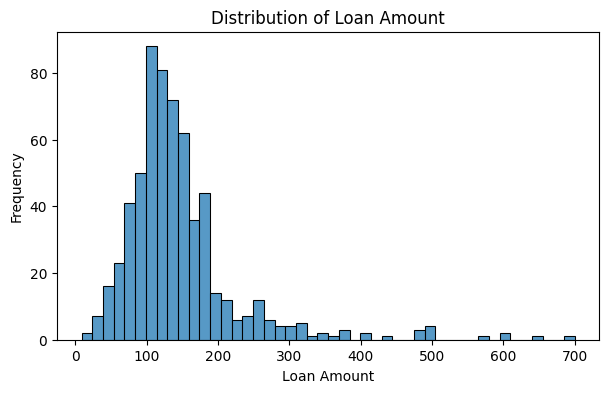

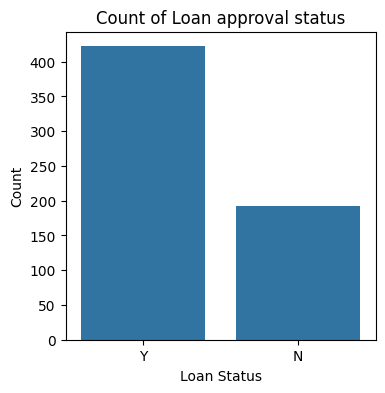

In [ ]:
# visualization of data
plt.figure(figsize=(7,4))
sns.histplot(data['LoanAmount'])
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(x='Loan_Status', data = data)
plt.title("Count of Loan approval status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [ ]:
# seperating features(X) from the target variable(y)
from sklearn.model_selection import train_test_split
X = data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

print(X.info())
print(y.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Loan_Status
Non-Null Count  Dtype 
--------------  ----- 
614 non-null  

In [ ]:
# One-hot encoding is a technique used to convert categorical data into numerical data.
# It involves creating a new binary column for each category and setting the column to 1 if the category is present and 0 otherwise.

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# X is the dataframe and y is the target variable
# identifying numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# creating transformers for numeric and categorical data
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# combining transformers using ColumnTransformer
preprocessor = ColumnTransformer(
         transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# creating a model
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

# fitting the model
m= model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# fitting dataset into model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Training Accuracy:  0.8207739307535642
Test Accuracy:  0.7886178861788617


[[18 25]
 [ 1 79]]


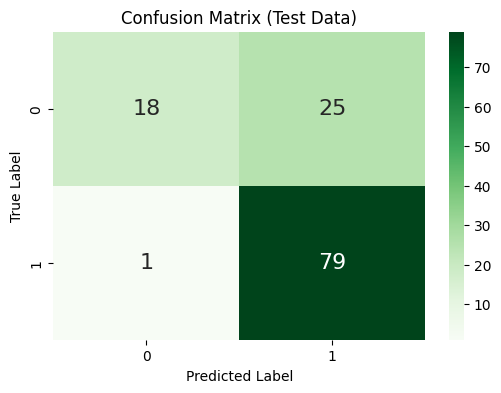

In [ ]:
from sklearn.metrics import confusion_matrix

# predictions on test set
pred = model.predict(X_test)

print(confusion_matrix(y_test,pred))

# calculating confusion matrix for test data
test_conf_matrix_lr = confusion_matrix(y_test, pred)

# plotting confusion matrix for test data
plt.figure(figsize=(6, 4))
sns.heatmap(test_conf_matrix_lr, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 16})
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# PART 2
# Check the summary statistics of the numerical columns
print("Summary statistics: \n ", data.describe())


Summary statistics: 
         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.000000   
std        6109.041673        2926.248369   84.037468         64.372489   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
def predict_prob(X):
    return m.predict_proba(X)[:,1]
predict_prob(X_test)

array([0.90748197, 0.92453622, 0.78975514, 0.76956586, 0.8945266 ,
       0.67065098, 0.93283733, 0.85922432, 0.62715856, 0.72517623,
       0.43464797, 0.76722066, 0.78611923, 0.67966234, 0.83966055,
       0.84352476, 0.76090661, 0.755549  , 0.85891094, 0.97010707,
       0.80402355, 0.89753008, 0.86684906, 0.85477576, 0.68522303,
       0.62406086, 0.51508338, 0.8827416 , 0.89167088, 0.91106112,
       0.84417917, 0.92559162, 0.86644051, 0.70820899, 0.68109407,
       0.08333835, 0.7797168 , 0.80509412, 0.93169392, 0.83804212,
       0.72857487, 0.54931987, 0.70628175, 0.78438685, 0.73383534,
       0.88422139, 0.64077338, 0.17533911, 0.14656593, 0.32897405,
       0.54930453, 0.88314162, 0.10338055, 0.63776832, 0.77535279,
       0.71536145, 0.65247052, 0.70134377, 0.08791256, 0.92017171,
       0.30372871, 0.84718464, 0.19888255, 0.75547561, 0.82649391,
       0.76063947, 0.90218613, 0.79715038, 0.81603439, 0.69922591,
       0.1032467 , 0.82225434, 0.89381855, 0.77317434, 0.35233

In [ ]:
# Check the correlation between the numerical columns
print("Correlation: \n", data.corr())

Correlation: 
                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565620   
CoapplicantIncome        -0.116605           1.000000    0.187828   
LoanAmount                0.565620           0.187828    1.000000   
Loan_Amount_Term         -0.045242          -0.059675    0.038801   
Credit_History           -0.018615           0.011134   -0.001431   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045242       -0.018615  
CoapplicantIncome         -0.059675        0.011134  
LoanAmount                 0.038801       -0.001431  
Loan_Amount_Term           1.000000        0.000432  
Credit_History             0.000432        1.000000  


<ipython-input-13-ddda5873b3ed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation: \n", data.corr())


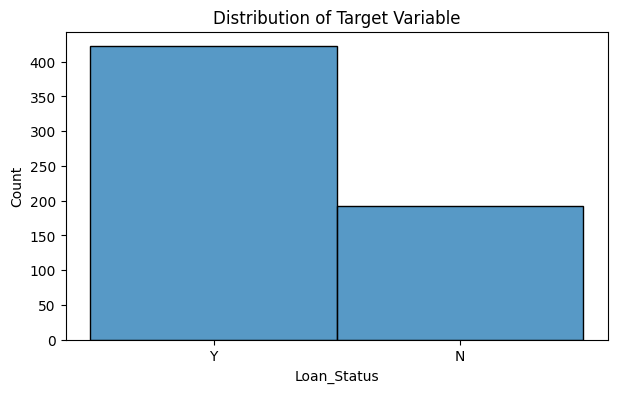

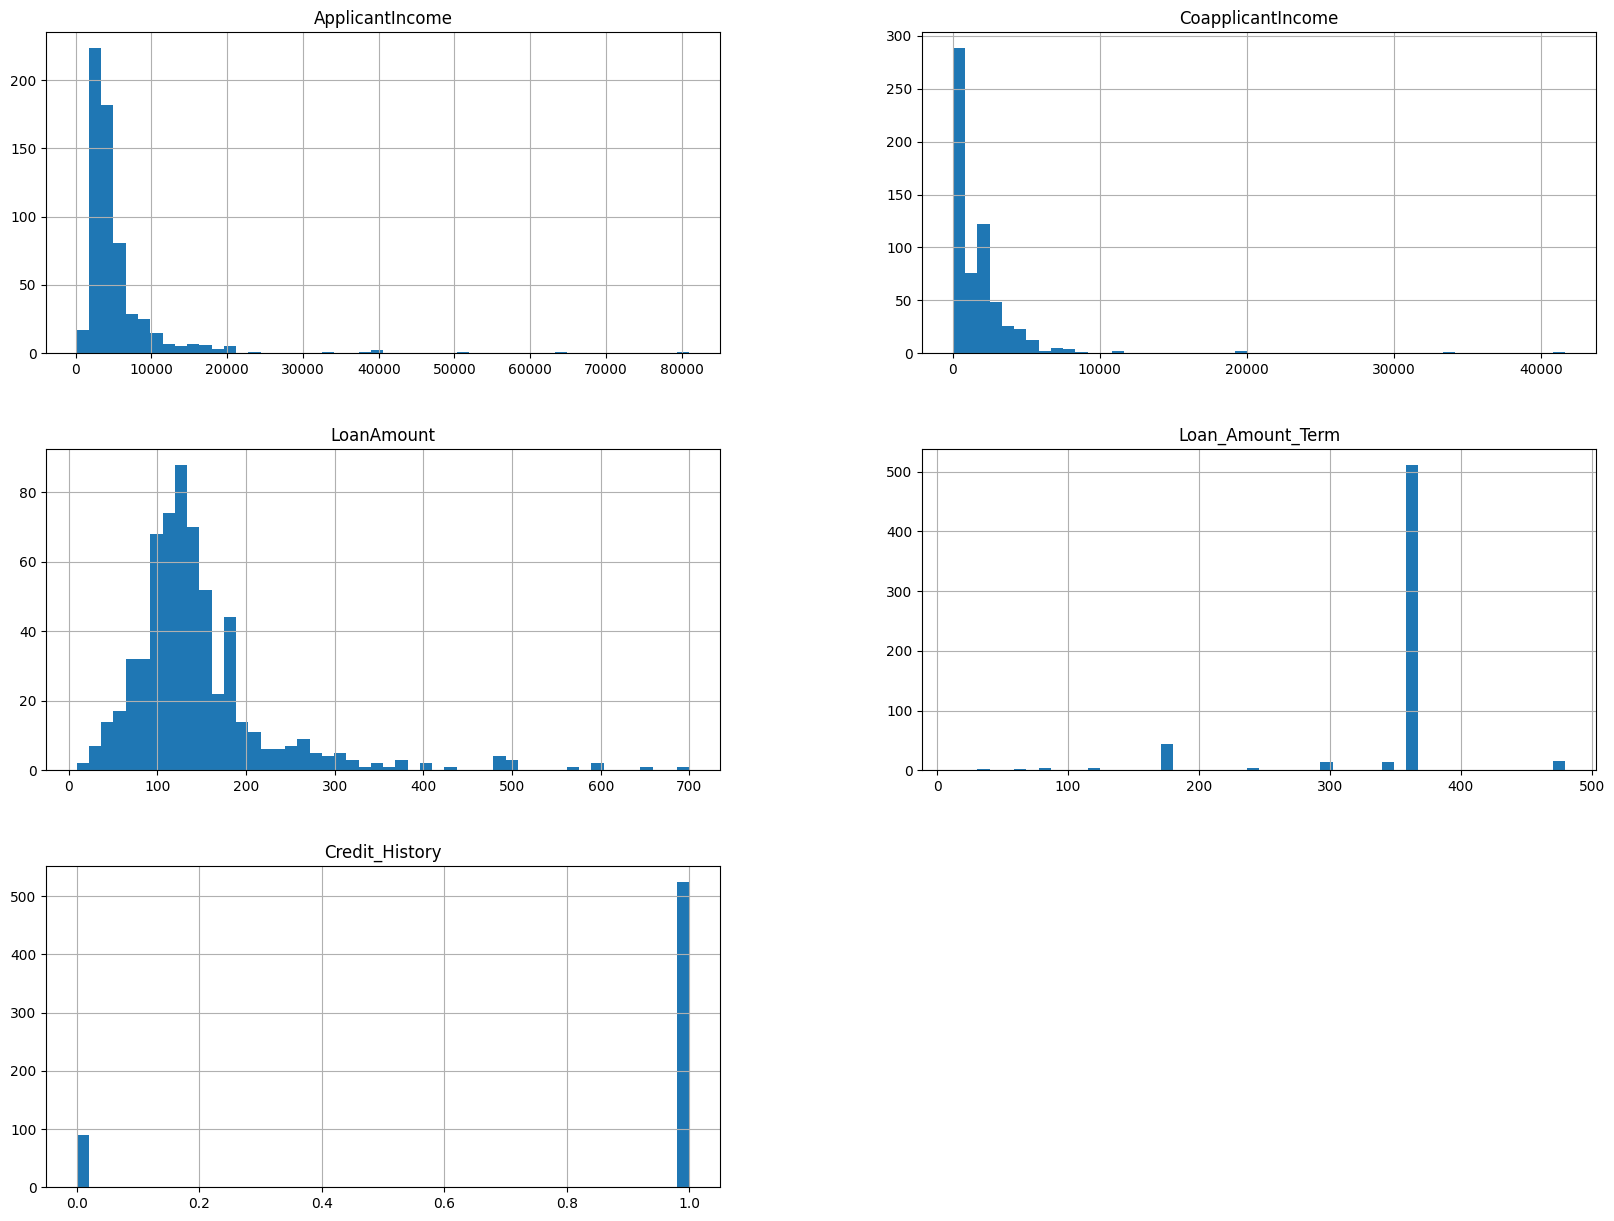

In [ ]:
# Visualize the distribution of the numerical columns using histograms
plt.figure(figsize=(7, 4))
sns.histplot(data['Loan_Status'])
plt.title('Distribution of Target Variable')
plt.show()
data.hist(bins=50, figsize=(20,15))
plt.show()

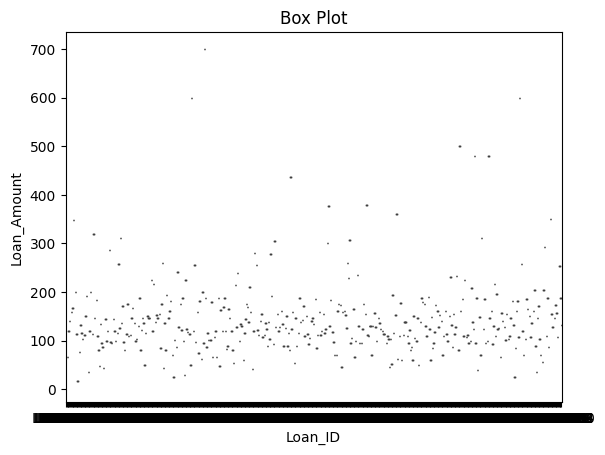

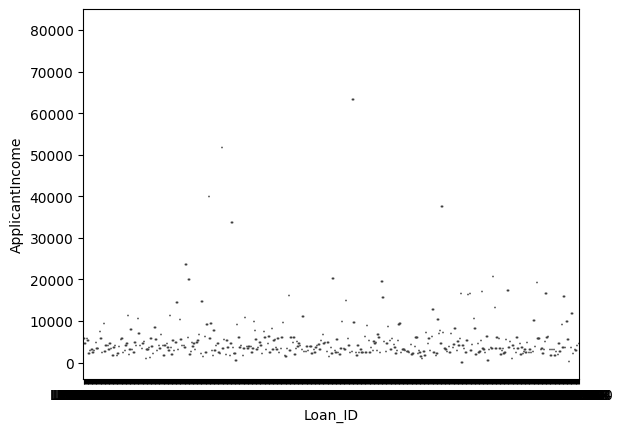

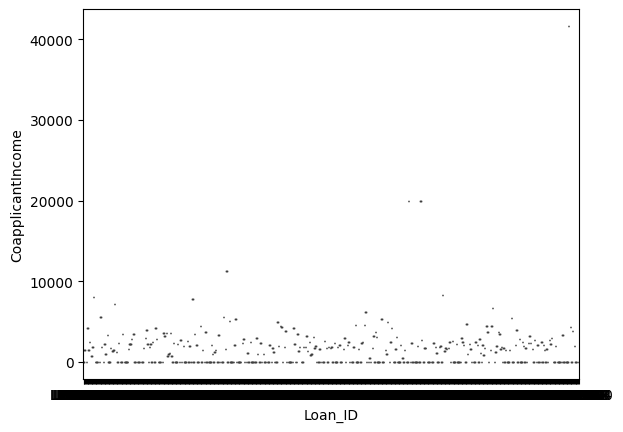

In [ ]:
# Visualize the relationship between the columns using box plots
plt.title("Box Plot")

sns.boxplot(x="Loan_ID", y="LoanAmount", data=data)
plt.xlabel("Loan_ID")
plt.ylabel("Loan_Amount")
plt.show()

sns.boxplot(x="Loan_ID", y="ApplicantIncome", data=data)
plt.xlabel("Loan_ID")
plt.ylabel("ApplicantIncome")
plt.show()

sns.boxplot(x="Loan_ID", y="CoapplicantIncome", data=data)
plt.xlabel("Loan_ID")
plt.ylabel("CoapplicantIncome")
plt.show()

<ipython-input-16-a180df4a3eeb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(y).mean().plot(kind='bar')


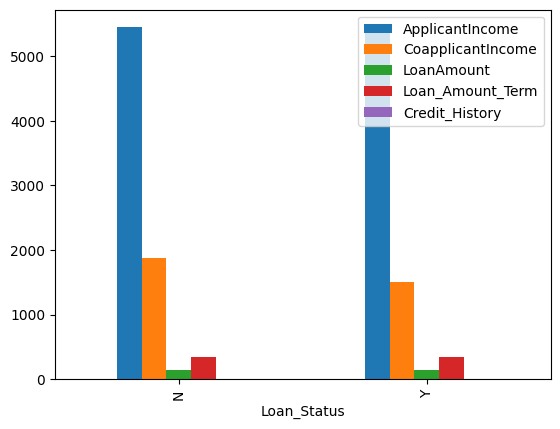

In [ ]:
# Visualize the relationship between the categorical columns and the target variable using bar plots
data.groupby(y).mean().plot(kind='bar')
plt.show()

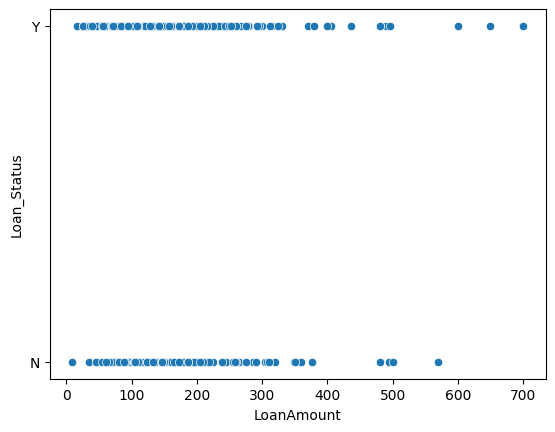

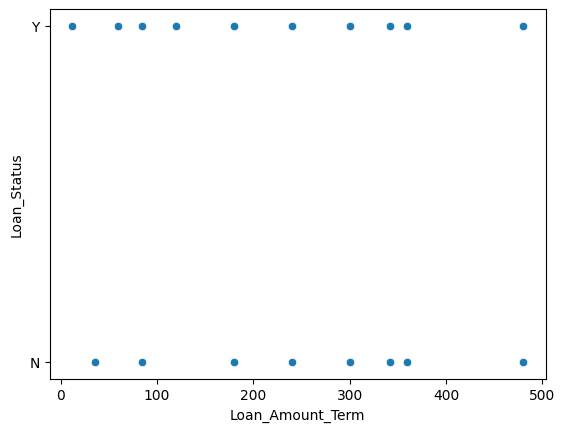

In [ ]:
# Visualize the correlation between the numerical columns and the target variable using scatter plots
sns.scatterplot(x='LoanAmount', y='Loan_Status', data=data)
plt.show()
sns.scatterplot(x='Loan_Amount_Term', y='Loan_Status', data=data)
plt.show()

# **CONCLUSION**



---


--> Analyzing loan approval rates by gender reveal potential gender biases in the lending process.
    Ensuring fairness and equality in loan approval decisions is crucial.


---


--> Married individuals have different loan approval rates compared to unmarried individuals.
    Similarly, the number of dependents also influence loan approval.
    These relationships can be examined by analyzing the 'Married' and 'Dependents' attributes.


---


--> Applicants with higher "education levels" (such as graduates) have better chances of loan approval compared to those with lower education levels.
    Similarly, being "self-employed" affects loan approval rates.


---


--> Higher income levels of applicants and co-applicants may positively influence loan approval chances.
    We can explore this relationship by examining how 'ApplicantIncome' and 'CoapplicantIncome' relate to the 'Loan_status'.


---


--> The "LoanAmount" and "Loan_Amount_Term" affect loan approval.
    Higher loan amounts might require stricter approval criteria, while shorter loan terms might have higher chances of approval.


---


--> "Credit history" often plays a significant role in loan approval.  
    Individuals with a good credit history are more likely to get their loans approved compared to those with a poor credit history.
    This can be verified by analyzing the relationship between the 'Credit_history' attribute and the 'Loan_status'.


---


--> The area where the "property" is located (urban, semi-urban, or rural) also impact loan approval.
    Individuals in urban or semi-urban areas may have better access to financial resources and hence higher loan approval rates.



